In [3]:
import pandas as pd
import numpy as np


In [4]:
#Predicting what price competitors will put for a specific flight (top 10 competitors for example)

In [5]:
file = "SkyScannerRedirrect_DataScienceBootCamp.csv"

In [6]:
df = pd.read_csv(file)

In [7]:
df[df["isEWRoute"] == 1]
#Flights that are eurowing flights

,flightWeek,OriginAirport,DestinationAirport,OriginCountry,DestinationCountry,mainCarrier,isConnectingFlight,isEWRoute,Market,UserCountryCode,...,kind,TripLengthNights,TravelHorizonDays,RedirectsCount,Revenue,Segments,ODPax,TripPax,weekOfYear,Average_FlightFare
15,2024-W23,DUS,LHR,DE,GB,EW,0,1,UK,GB,...,ONE_WAY,NaN,39,2,459.59,3,2,3,2024-W18,153.196667
38,2024-W22,STR,LHR,DE,GB,EW,0,1,DE,DE,...,RETURN,3.0,28,7,4408.41,26,14,13,2024-W18,169.554231
45,2024-W36,AGP,CGN,ES,DE,FR,0,1,DE,DE,...,ONE_WAY,NaN,127,4,583.66,8,4,8,2024-W18,72.957500
51,2024-W20,TFS,DUS,ES,DE,XR,0,1,ES,ES,...,ONE_WAY,NaN,14,1,94.72,1,1,1,2024-W18,94.720000
60,2024-W20,CGN,TIA,DE,AL,W4,0,1,DE,DE,...,RETURN,14.0,16,2,462.17,8,4,4,2024-W18,57.771250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048510,2024-W18,FMM,PMI,DE,ES,FR,0,1,DE,DE,...,RETURN,7.0,1,2,372.89,4,4,2,2024-W18,93.222500
1048513,2024-W19,DUS,MUC,DE,DE,EW,0,1,DE,DE,...,RETURN,1.0,11,2,457.59,4,4,2,2024-W18,114.397500
1048524,2024-W34,VIE,HAM,AT,DE,EW,0,1,DE,DE,...,ONE_WAY,NaN,114,1,149.67,1,1,1,2024-W18,149.670000
1048535,2024-W19,HAM,MAN,DE,GB,EW,0,1,UK,GB,...,ONE_WAY,NaN,9,1,85.19,1,1,1,2024-W18,85.190000


In [8]:
df["mainCarrier"].value_counts().count()
#number of different airlines

252

In [9]:
((df["mainCarrier"].value_counts() > 10) == True)



FR     True
U2     True
VY     True
PC     True
W4     True
      ...  
BS    False
BU    False
6E    False
UF    False
N0    False
Name: mainCarrier, Length: 252, dtype: bool

In [10]:
value_counts = df["mainCarrier"].value_counts()

# Filter to get only those counts greater than 10
counts_greater_than_10 = value_counts > 1000

# Sum the True values to get the count of mainCarriers with more than 10 occurrences
count_of_mainCarriers_above_1000 = counts_greater_than_10.sum()
count_of_mainCarriers_above_1000

92

In [11]:
count_of_mainCarriers_above_1000

92

In [12]:
import seaborn as sns

# Random fuckery

In [13]:
correlation = df.corr()

<AxesSubplot:>

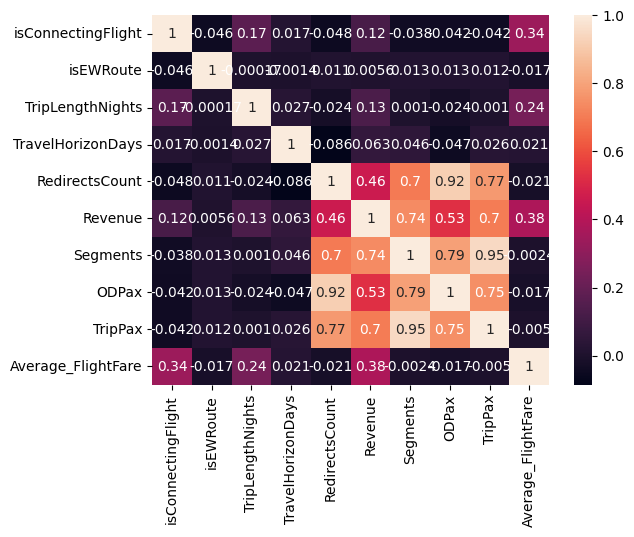

In [14]:
sns.heatmap(correlation, annot=True)

In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
from sklearn.ensemble import RandomForestRegressor

In [17]:
from sklearn.preprocessing import StandardScaler

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 21 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   flightWeek          1048575 non-null  object 
 1   OriginAirport       1048575 non-null  object 
 2   DestinationAirport  1048575 non-null  object 
 3   OriginCountry       1048575 non-null  object 
 4   DestinationCountry  1048575 non-null  object 
 5   mainCarrier         1048498 non-null  object 
 6   isConnectingFlight  1048575 non-null  int64  
 7   isEWRoute           1048575 non-null  int64  
 8   Market              1048567 non-null  object 
 9   UserCountryCode     1048106 non-null  object 
 10  cabinClass          1048575 non-null  object 
 11  kind                1048575 non-null  object 
 12  TripLengthNights    627923 non-null   float64
 13  TravelHorizonDays   1048575 non-null  int64  
 14  RedirectsCount      1048575 non-null  int64  
 15  Revenue        

In [20]:
numeric_columns = df.dtypes[(df.dtypes == "int64") | (df.dtypes == "float64")].index


In [21]:
numeric_columns

Index(['isConnectingFlight', 'isEWRoute', 'TripLengthNights',
       'TravelHorizonDays', 'RedirectsCount', 'Revenue', 'Segments', 'ODPax',
       'TripPax', 'Average_FlightFare'],
      dtype='object')

In [22]:
X = df[numeric_columns].drop(columns=["Average_FlightFare", "TripLengthNights", "RedirectsCount", "Segments"]) 
y = df["Average_FlightFare"]

In [23]:
scaler = StandardScaler().set_output(transform="pandas")
X_scaled = scaler.fit_transform(X)

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, train_size=0.7)

In [ ]:
model1 = RandomForestRegressor()
model1.fit(X_train, y_train)

In [ ]:
y_pred = model1.predict(X_test)

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
model1.score(X_test, y_test)

In [ ]:
r2_score(y_test, y_pred)

# Preprocessing



In [ ]:
df.info()

In [ ]:
numeric_columns = df.dtypes[(df.dtypes == "int64") | (df.dtypes == "float64")].index


In [ ]:
string_columns = df.

# Nils Exploration

In [ ]:
df.head()